In [97]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from torch.utils.data import DataLoader, Dataset
import torch

np.random.seed(42)
n = 5000

df = pd.DataFrame({
    '지점': np.random.choice(['서울', '부산', '대전'], n),
    '장소': np.random.choice(['실내', '실외'], n),
    '상태': np.random.choice(['정상', '주의', '위험'], n),
    '장비명': np.random.choice(['A1', 'B2', 'C3'], n),
    '온도': np.random.normal(25, 5, n),
    '진동': np.random.normal(0.5, 0.2, n),
    '전류': np.random.normal(3.0, 0.5, n),
    '압력': np.random.normal(1.0, 0.1, n),
    '시작시간': pd.date_range('2024-01-01', periods=n, freq='H')
})
df['종료시간'] = df['시작시간'] + pd.Timedelta(hours=1)
df['에너지사용량'] = df['온도']*0.5 + df['전류']*1.2 + np.random.normal(0, 0.5, n)

C:\Users\3\AppData\Local\Temp\ipykernel_119076\1300684154.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  '시작시간': pd.date_range('2024-01-01', periods=n, freq='H')


In [86]:
df

,지점,장소,상태,장비명,온도,진동,전류,압력,시작시간,종료시간,에너지사용량
0,대전,실내,주의,B2,24.118187,0.383603,2.439801,1.086833,2024-01-01 00:00:00,2024-01-01 01:00:00,15.853302
1,서울,실내,위험,A1,17.365554,0.411542,2.698062,0.784365,2024-01-01 01:00:00,2024-01-01 02:00:00,11.701820
2,대전,실내,위험,A1,23.684701,0.682598,3.510641,0.965160,2024-01-01 02:00:00,2024-01-01 03:00:00,16.111446
3,대전,실외,정상,C3,24.218521,0.447242,3.115501,1.085519,2024-01-01 03:00:00,2024-01-01 04:00:00,15.356875
4,서울,실외,위험,A1,16.508494,0.518519,3.180125,0.813375,2024-01-01 04:00:00,2024-01-01 05:00:00,12.118880
...,...,...,...,...,...,...,...,...,...,...,...
4995,서울,실내,주의,A1,24.905006,0.543409,3.604103,0.741683,2024-07-27 03:00:00,2024-07-27 04:00:00,16.374590
4996,부산,실외,위험,C3,24.252701,0.503841,2.802598,1.038421,2024-07-27 04:00:00,2024-07-27 05:00:00,15.041399
4997,대전,실내,정상,B2,19.819118,0.441876,3.850387,0.976770,2024-07-27 05:00:00,2024-07-27 06:00:00,15.273830
4998,부산,실내,주의,B2,27.725716,0.359282,3.382686,1.075058,2024-07-27 06:00:00,2024-07-27 07:00:00,18.514228


In [ ]:
# 문자열 피처 인코딩
for col in ['지점', '장소', '상태', '장비명']:
    df[col] = LabelEncoder().fit_transform(df[col])

# 피처 선택
features = ['지점', '장소', '상태', '장비명', '온도', '진동', '전류', '압력']
target = '에너지사용량'

# 정규화
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features + [target]])
df_scaled = pd.DataFrame(scaled, columns=features + [target])

# 시퀀스 만들기
def create_sequences(data, seq_len):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        x = data[i:i+seq_len, :-1]
        y = data[i+seq_len, -1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_len = 10
X, y = create_sequences(df_scaled.values, seq_len)


In [98]:
df_scaled

,지점,장소,상태,장비명,온도,진동,전류,압력,에너지사용량
0,0.0,0.0,1.0,0.5,0.472542,0.427148,0.299726,0.602693,0.478811
1,1.0,0.0,0.0,0.0,0.261461,0.447669,0.371225,0.194058,0.249883
2,0.0,0.0,0.0,0.0,0.458992,0.646756,0.596186,0.438312,0.493046
3,0.0,1.0,0.5,1.0,0.475678,0.473890,0.486792,0.600917,0.451436
4,1.0,1.0,0.0,0.0,0.234671,0.526242,0.504683,0.233251,0.272881
...,...,...,...,...,...,...,...,...,...
4995,1.0,0.0,1.0,0.0,0.497137,0.544523,0.622061,0.136395,0.507556
4996,0.5,1.0,0.0,1.0,0.476747,0.515461,0.400165,0.537288,0.434040
4997,0.0,0.0,0.5,0.5,0.338157,0.469949,0.690244,0.453997,0.446857
4998,0.5,0.0,1.0,0.5,0.585310,0.409284,0.560762,0.586784,0.625544


In [88]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = TimeSeriesDataset(X, y)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [100]:
X.shape,y.shape

((4990, 10, 8), (4990,))

In [89]:
import torch.nn as nn

class LSTMRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # 마지막 시점 출력
        return self.fc(out).squeeze()

model = LSTMRegressor(input_dim=X.shape[2], hidden_dim=64, num_layers=2)

In [90]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(250):
    model.train()
    total_loss = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}: Loss = {total_loss / len(loader):.4f}')

Epoch 1: Loss = 0.0326
Epoch 2: Loss = 0.0208
Epoch 3: Loss = 0.0207
Epoch 4: Loss = 0.0207
Epoch 5: Loss = 0.0207
Epoch 6: Loss = 0.0207
Epoch 7: Loss = 0.0211
Epoch 8: Loss = 0.0208
Epoch 9: Loss = 0.0207
Epoch 10: Loss = 0.0206
Epoch 11: Loss = 0.0207
Epoch 12: Loss = 0.0206
Epoch 13: Loss = 0.0208
Epoch 14: Loss = 0.0208
Epoch 15: Loss = 0.0208
Epoch 16: Loss = 0.0207
Epoch 17: Loss = 0.0207
Epoch 18: Loss = 0.0207
Epoch 19: Loss = 0.0207
Epoch 20: Loss = 0.0206
Epoch 21: Loss = 0.0207
Epoch 22: Loss = 0.0207
Epoch 23: Loss = 0.0207
Epoch 24: Loss = 0.0206
Epoch 25: Loss = 0.0207
Epoch 26: Loss = 0.0207
Epoch 27: Loss = 0.0206
Epoch 28: Loss = 0.0206
Epoch 29: Loss = 0.0206
Epoch 30: Loss = 0.0207
Epoch 31: Loss = 0.0207
Epoch 32: Loss = 0.0206
Epoch 33: Loss = 0.0207
Epoch 34: Loss = 0.0207
Epoch 35: Loss = 0.0207
Epoch 36: Loss = 0.0208
Epoch 37: Loss = 0.0206
Epoch 38: Loss = 0.0206
Epoch 39: Loss = 0.0207
Epoch 40: Loss = 0.0205
Epoch 41: Loss = 0.0207
Epoch 42: Loss = 0.0206
E

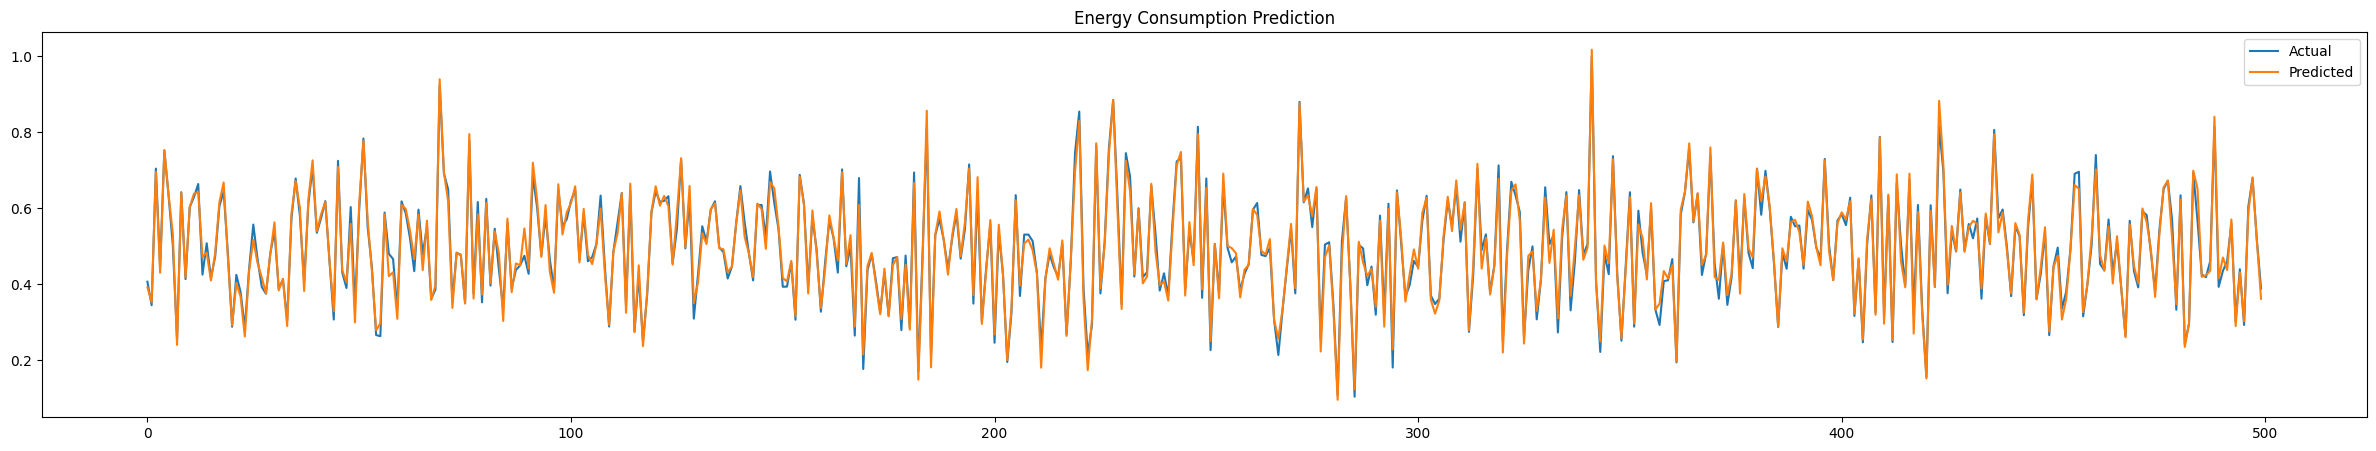

In [91]:
import matplotlib.pyplot as plt

# test_loader를 만드셨다면 그걸로, 아니면 같은 loader 사용해도 무방
model.eval()
preds = []
trues = []

with torch.no_grad():
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        preds.append(out.cpu().numpy())
        trues.append(yb.cpu().numpy())

preds = np.concatenate(preds)
trues = np.concatenate(trues)

# 예: 처음 100개만 비교 시각화
plt.figure(figsize=(30,5))
plt.plot(trues[:500], label='Actual')
plt.plot(preds[:500], label='Predicted')
plt.legend(); plt.title('Energy Consumption Prediction')
plt.show()

In [ ]:
# 1) 예시: 최근 10개 시간의 피처(8개) 값. shape=(10, num_features)
sample_seq = df_scaled[features].values[-10:]  

# 2) Tensor 변환 & 배치 차원 추가
x_sample = torch.tensor(sample_seq, dtype=torch.float32).unsqueeze(0)  # (1,10,8)
x_sample = x_sample.to(device)

# 3) 예측
model.eval()
with torch.no_grad():
    y_pred = model(x_sample).cpu().item()

print(f'예측된 에너지 사용량: {y_pred:.4f}')

예측된 에너지 사용량: 0.4357


In [109]:
# 1. 입력 시퀀스 준비
last_sequence = df_scaled.iloc[-seq_len:, :-1].values  # shape: (10, 8)

# 2. 차원 추가 (배치 차원 포함)
last_sequence_tensor = torch.tensor(last_sequence, dtype=torch.float32).unsqueeze(0)  # shape: (1, 10, 8)

# 3. GPU 이동
last_sequence_tensor = last_sequence_tensor.to(device)

# 4. 예측 수행
model.eval()
with torch.no_grad():
    prediction = model(last_sequence_tensor).cpu().item()
# 예측값을 역정규화
input_arr = np.zeros((1, len(features) + 1))
input_arr[0, target_idx] = prediction
inv = scaler.inverse_transform(input_arr)
if inv.ndim == 2:
    prediction_real = inv[0, target_idx]
else:
    prediction_real = inv[target_idx]
print(f"예측된 에너지 사용량: {prediction_real:.2f}")


예측된 에너지 사용량: 15.07


In [112]:
def create_sequences_with_n(data, seq_len, max_n):
    xs, ns, ys = [], [], []
    for i in range(len(data) - seq_len - max_n):
        x = data[i:i+seq_len, :-1]
        for n in range(1, max_n + 1):
            y = data[i + seq_len + n - 1, -1]  # n시간 뒤
            xs.append(x)
            ns.append([n])  # n을 하나의 특성처럼 사용
            ys.append(y)
    return np.array(xs), np.array(ns), np.array(ys)

class LSTMWithN(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc_n = nn.Linear(1, hidden_dim)  # n시간을 임베딩해서 결합
        self.fc_out = nn.Linear(hidden_dim * 2, 1)

    def forward(self, x, n):
        # x: (batch, seq_len, input_dim)
        # n: (batch, 1)
        out, _ = self.lstm(x)
        last_out = out[:, -1, :]  # (batch, hidden_dim)

        n_feat = self.fc_n(n)  # (batch, hidden_dim)
        combined = torch.cat([last_out, n_feat], dim=1)  # (batch, hidden_dim * 2)

        return self.fc_out(combined).squeeze()

class CustomTimeSeriesWithNDataset(Dataset):
    def __init__(self, X, n_array, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.n = torch.tensor(n_array, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.n[idx], self.y[idx]


In [ ]:
# 문자열 피처 인코딩
for col in ['지점', '장소', '상태', '장비명']:
    df[col] = LabelEncoder().fit_transform(df[col])

# 피처 선택
features = ['지점', '장소', '상태', '장비명', '온도', '진동', '전류', '압력']
target = '에너지사용량'

# 정규화
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[features + [target]])
df_scaled = pd.DataFrame(scaled, columns=features + [target])

seq_len = 10
max_n = 6  # 최대 6시간 뒤까지 학습

X,n_array, y = create_sequences_with_n(df_scaled.values, seq_len,max_n)


In [120]:
dataset = CustomTimeSeriesWithNDataset(X, n_array, y)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

model = LSTMWithN(input_dim=X.shape[2], hidden_dim=64, num_layers=2).to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):
    model.train()
    total_loss = 0
    for xb, nb, yb in loader:
        xb, nb, yb = xb.to(device), nb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb, nb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"[Epoch {epoch+1}] Loss: {total_loss / len(loader):.4f}")


[Epoch 1] Loss: 0.0231
[Epoch 2] Loss: 0.0213
[Epoch 3] Loss: 0.0212
[Epoch 4] Loss: 0.0213
[Epoch 5] Loss: 0.0210
[Epoch 6] Loss: 0.0214
[Epoch 7] Loss: 0.0212
[Epoch 8] Loss: 0.0218
[Epoch 9] Loss: 0.0212
[Epoch 10] Loss: 0.0214
[Epoch 11] Loss: 0.0211
[Epoch 12] Loss: 0.0213
[Epoch 13] Loss: 0.0213
[Epoch 14] Loss: 0.0212
[Epoch 15] Loss: 0.0211
[Epoch 16] Loss: 0.0211
[Epoch 17] Loss: 0.0212
[Epoch 18] Loss: 0.0212
[Epoch 19] Loss: 0.0211
[Epoch 20] Loss: 0.0211
[Epoch 21] Loss: 0.0209
[Epoch 22] Loss: 0.0211
[Epoch 23] Loss: 0.0209
[Epoch 24] Loss: 0.0210
[Epoch 25] Loss: 0.0208
[Epoch 26] Loss: 0.0209
[Epoch 27] Loss: 0.0206
[Epoch 28] Loss: 0.0209
[Epoch 29] Loss: 0.0207
[Epoch 30] Loss: 0.0203
[Epoch 31] Loss: 0.0203
[Epoch 32] Loss: 0.0204
[Epoch 33] Loss: 0.0202
[Epoch 34] Loss: 0.0200
[Epoch 35] Loss: 0.0199
[Epoch 36] Loss: 0.0199
[Epoch 37] Loss: 0.0199
[Epoch 38] Loss: 0.0198
[Epoch 39] Loss: 0.0195
[Epoch 40] Loss: 0.0194
[Epoch 41] Loss: 0.0196
[Epoch 42] Loss: 0.0193
[

In [118]:
# 최근 10개 시점 가져오기
past_seq = df_scaled.iloc[-seq_len:, :-1].values  # shape: (10, 8)
past_seq_tensor = torch.tensor(past_seq, dtype=torch.float32).unsqueeze(0).to(device)

# 원하는 n시간 뒤
n = 1
n_tensor = torch.tensor([[n]], dtype=torch.float32).to(device)

model.eval()
with torch.no_grad():
    pred = model(past_seq_tensor, n_tensor).cpu().item()

# 역정규화
target_idx = len(features)
arr = np.zeros((1, len(features) + 1))
arr[0, target_idx] = pred
pred_real = scaler.inverse_transform(arr)[0, target_idx]
print(f"{n}시간 뒤 예측 에너지 사용량: {pred_real:.2f}")


1시간 뒤 예측 에너지 사용량: 16.24


In [121]:
# 최근 10개 시점 가져오기
past_seq = df_scaled.iloc[-seq_len:, :-1].values  # shape: (10, 8)
past_seq_tensor = torch.tensor(past_seq, dtype=torch.float32).unsqueeze(0).to(device)

# 원하는 n시간 뒤
n = 1
n_tensor = torch.tensor([[n]], dtype=torch.float32).to(device)

model.eval()
with torch.no_grad():
    pred = model(past_seq_tensor, n_tensor).cpu().item()

# 역정규화
target_idx = len(features)
arr = np.zeros((1, len(features) + 1))
arr[0, target_idx] = pred
pred_real = scaler.inverse_transform(arr)[0, target_idx]
print(f"{n}시간 뒤 예측 에너지 사용량: {pred_real:.2f}")


1시간 뒤 예측 에너지 사용량: 15.38


In [122]:
for n in [1, 2, 3, 6, 12]:
    n_tensor = torch.tensor([[n]], dtype=torch.float32).to(device)
    with torch.no_grad():
        pred = model(past_seq_tensor, n_tensor).cpu().item()
    arr[0, target_idx] = pred
    pred_real = scaler.inverse_transform(arr)[0, target_idx]
    print(f"{n}시간 뒤 예측: {pred_real:.2f}")

1시간 뒤 예측: 15.38
2시간 뒤 예측: 15.31
3시간 뒤 예측: 15.25
6시간 뒤 예측: 15.07
12시간 뒤 예측: 14.70
